# Bayesian Network - Habits & Diseases

> This document is written in *Python 3*.
>
> ***GitHub***: https://github.com/czs108

## Background

> Either *smoking* or *bad diet* or both can make *heart disease* more likely.
>
> Heart disease can produce either or both of the following two symptoms:
>
> - *High blood pressure*.
> - *Abnormal electrocardiogram*.
>
> You can use the following symbols:

\begin{align}
S &= \text{Smoking} \\
D &= \text{Bad diet} \\
H &= \text{Heart disease} \\
B &= \text{High blood pressure} \\
E &= \text{Abnormal electrocardiogram}
\end{align}

> Suppose a medical survey gives you the following data:

\begin{align}
P(S) = 0.3 \\
P(D) = 0.4
\end{align}

\begin{align}
P(H \mid S \cap D) = 0.8 \\
P(H \mid \overline{S} \cap D) = 0.5 \\
P(H \mid S \cap \overline{D}) = 0.4 \\
P(H \mid \overline{S} \cap \overline{D}) = 0.1
\end{align}

\begin{align}
P(B \mid H) = 0.7 \\
P(B \mid \overline{H}) = 0.1 \\
P(E \mid H) = 0.8 \\
P(E \mid \overline{H}) = 0.1
\end{align}

## Question A

> Draw a *Bayesian Network* to represent these relations.

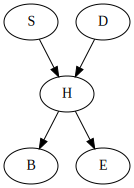

In [1]:
from graphviz import Digraph

bayes = Digraph()
bayes.node("S")
bayes.node("D")
bayes.node("H")
bayes.node("B")
bayes.node("E")
bayes.edges(["SH", "DH", "HB", "HE"])

bayes

## Question B

> What is the probability of the following situations:

### Question 1

> Have *heart disease*.

\begin{equation}
\begin{split}
P(H \cap S \cap D)
    &= P(H \mid S \cap D) \cdot P(S) \cdot P(D) \\
    &= 0.8 \times 0.3 \times 0.4 \\
    &= 0.096
\end{split}
\end{equation}

\begin{equation}
\begin{split}
P(H \cap \overline{S} \cap D)
    &= P(H \mid \overline{S} \cap D) \cdot P(\overline{S}) \cdot P(D) \\
    &= 0.5 \times 0.7 \times 0.4 \\
    &= 0.14
\end{split}
\end{equation}

\begin{equation}
\begin{split}
P(H \cap S \cap \overline{D}) 
    &= P(H \mid S \cap \overline{D}) \cdot P(S) \cdot P(\overline{D}) \\
    &= 0.4 \times 0.3 \times 0.6 \\
    &= 0.072
\end{split}
\end{equation}

\begin{equation}
\begin{split}
P(H \cap \overline{S} \cap \overline{D})
    &= P(H \mid \overline{S} \cap \overline{D}) \cdot P(\overline{S}) \cdot P(\overline{D}) \\
    &= 0.1 \times 0.7 \times 0.6 \\
    &= 0.042
\end{split}
\end{equation}

\begin{equation}
\begin{split}
P(H) &= P(H \cap S \cap D) + P(H \cap \overline{S} \cap D)
    + P(H \cap S \cap \overline{D}) + P(H \cap \overline{S} \cap \overline{D}) \\
    &= 0.096 + 0.14 + 0.072 + 0.042 \\
    &= 0.35
\end{split}
\end{equation}

### Question 2

> Have *high blood pressure*.

\begin{equation}
\begin{split}
P(B) &= P(H \cap B) + P(\overline{H} \cap B) \\
    &= P(B \mid H) \cdot P(H) + P(B \mid \overline{H}) \cdot P(\overline{H}) \\
    &= 0.7 \times 0.35 + 0.1 \times 0.65 \\
    &= 0.31
\end{split}
\end{equation}

### Question 3

> Have *heart disease* given *high blood pressure*.

\begin{equation}
\begin{split}
P(H \mid B) &= \frac{P(H \cap B)}{P(B)} \\
    &= \frac{P(B \mid H) \cdot P(H)}{P(B)} \\
    &= \frac{0.7 \times 0.35}{0.31} \\
    &= 0.79
\end{split}
\end{equation}

### Question 4

> Have *high blood pressure* and an *abnormal electrocardiogram*.

\begin{equation}
\begin{split}
P(B \cap E) &= P(B \cap E \cap H) + P(B \cap E \cap \overline{H}) \\
    &= P(B \cap E \mid H) \cdot P(H) + P(B \cap E \mid \overline{H}) \cdot P(\overline{H}) \\
    &= P(B \mid H) \cdot P(E \mid H) \cdot P(H)
    + P(B \mid \overline{H}) \cdot P(E \mid \overline{H}) \cdot P(\overline{H}) \\
    &= 0.7 \times 0.8 \times 0.35 + 0.1 \times 0.1 \times 0.65 \\
    &= 0.2025
\end{split}
\end{equation}

### Question 5

> Have *heart disease* given *high blood pressure* and an *abnormal electrocardiogram*.

\begin{equation}
\begin{split}
P(H \mid B \cap E) &= \frac{P(B \cap E \mid H) \cdot P(H)}{P(B \cap E)} \\
    &= \frac{0.7 \times 0.8 \times 0.35}{0.2025} \\
    &= 0.9679
\end{split}
\end{equation}

### Question 6

> Have *heart disease* given *high blood pressure* and a ***normal*** *electrocardiogram*.

\begin{equation}
\begin{split}
P(B \cap \overline{E})
    &= P(B \cap \overline{E} \mid H) \cdot P(H)
    + P(B \cap \overline{E} \mid \overline{H}) \cdot P(\overline{H}) \\
    &= P(B \mid H) \cdot P(\overline{E} \mid H) \cdot P(H)
    + P(B \mid \overline{H}) \cdot P(\overline{E} \mid \overline{H}) \cdot P(\overline{H}) \\
    &= 0.7 \times 0.2 \times 0.35 + 0.1 \times 0.9 \times 0.65 \\
    &= 0.166
\end{split}
\end{equation}

\begin{equation}
\begin{split}
P(H \mid B \cap \overline{E}) &= \frac{P(B \cap \overline{E} \mid H) \cdot P(H)}{P(B \cap \overline{E})} \\
    &= \frac{P(B \mid H) \cdot P(\overline{E} \mid H) \cdot P(H)}{P(B \cap \overline{E})} \\
    &= \frac{0.7 \times 0.2 \times 0.35}{0.166} \\
    &= 0.2952
\end{split}
\end{equation}

### Question 7

> Have *heart disease* given *smoking*.

\begin{equation}
\begin{split}
P(S \cap H) &= P(S \cap D \cap H) + P(S \cap \overline{D} \cap H) \\
    &= 0.096 + 0.072 \\
    &= 0.168
\end{split}
\end{equation}

\begin{equation}
\begin{split}
P(H \mid S) &= \frac{P(S \mid H) \cdot P(H)}{P(S)} \\
    &= \frac{P(S \cap H)}{P(S)} \\
    &= 0.56
\end{split}
\end{equation}

### Question 8

> Have an *abnormal electrocardiogram* given *smoking*.

\begin{equation}
\begin{split}
P(E \mid S) &= P(E \mid H) \cdot P(H \mid S)
    + P(E \mid \overline{H}) \cdot P(\overline{H} \mid S) \\
    &= 0.8 \times 0.56 + 0.1 \times 0.44 \\
    &= 0.492
\end{split}
\end{equation}

### Question 9

> Have *heart disease* given an *abnormal electrocardiogram* and *smoking*.

Event $S$ and $E$ are *conditionally independent* under the status of $H$.

\begin{equation}
P(E \mid S \cap H) = P(E \mid H)
\end{equation}

Knowing $S$ does not provide any information about $E$.

\begin{equation}
\begin{split}
P(H \mid E \cap S) &= \frac{P(H \cap E \cap S)}{P(E \cap S)} \\
    &= \frac{P(S) \cdot P(H \mid S) \cdot P(E \mid H)}{P(S) \cdot P(E \mid S)} \\
    &= 0.9106
\end{split}
\end{equation}